<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 6 - Due March 12, Thursday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Coding Assignments:

1. Use the EM algorithm to fit a (1 − π) : π mixture of two Poisson distributions, Poisson(λ1)
and Poisson(λ2), to the following data:

(a) Derive the EM algorithm for the maximum likelihood estimates of π; λ1; λ2. Present your
derivation in a Markdown cell in the Jupyter Notebook.

\begin{align}
& f_y\left(x|\theta \right) = \pi\frac{{\lambda_1}^{(t)x}}{x!} \exp(-{\lambda_1}^{(t)}) + (1-\pi)\frac{{\lambda_2}^{(t)x}}{x!}\exp(-{\lambda_2}^{(t)}) \\
& \theta = (\pi,\lambda_1,\lambda_2)^T \\ 
& Z = (Z_1, ... , Z_N)^T \\
& Assuming \: that \:Z \:is \:a \:binomial \:distribution \:we \:can \:write: \\
& Z_i = \begin{cases} 1 & for Y_i~Poisson(\lambda_1)\\ 2 & for Y_i~Poisson(\lambda_2) \\ \end{cases} \\
& P(Z_i  = 1) = \pi \\
& Z_i = Binomial(1,\pi) \\
& Therefore \:the \: likelihood \:function \: can \:be \:written \:as: \\
& L(\theta|X) = \prod_{n=1}^{1096}f_y\left(x|\theta \right) \\
& L_n(\theta|X,Z) = \prod_{n=1}^{n}\pi^{Z_i}(1-\pi)^{1-Z_i} \left(\frac{{\lambda_1}^{x}}{x!} \exp(-{\lambda_1}) \right)^{Z_i} + \left(\frac{{\lambda_2}^{x}}{x!}\exp(-{\lambda_2}) \right)^{1-Z_i}\\
& where \:X \:is \:complete \:data \:and \:Z \:is \:missing \:data. \\
& n_k = \#[i: X_i = k] \\
& m_k = \sum_{i:X_i=k}^{1} Z_i, k = 0, ..., 9\\
& L_n(\theta|X,Z) = \prod_{k=0}^{\infty}\pi^{m_k}(1-\pi)^{n_k-m_k} \left(\frac{{\lambda_1}^{x}}{x!} \exp(-{\lambda_1}) \right)^{m_k} + \left(\frac{{\lambda_2}^{x}}{x!}\exp(-{\lambda_2}) \right)^{n_k-m_k}\\
& now \:the \:loglikelihood \:fucntion \:can \:be \:computed \:as: \\
& l_n(\theta|X,Z) = \sum_{k}^{}(m_k\log{\pi} + (n_k - m_k)\log(1-p)) +\sum_{k}^{}m_k(\log\lambda_1 - \lambda_1) + \sum_{k}^{}(n_k - m_k)(k\log\lambda_2 - \lambda_2)  \\
& \boldsymbol{E_{step}:} \\
& \pi_{k}^{i} = \frac{\pi^{(i)}.\frac{{\lambda_{1}^{i}}^k}{k}\exp(-\lambda_{1}^{i})}{\pi^{(i)}.\frac{{\lambda_{1}^{i}}^k}{k}\exp(-\lambda_{1}^{i}) + (1 - \pi^{(i)}).\frac{{\lambda_{2}^{i}}^k}{k}\exp(-\lambda_{2}^{i})} \\
& Therefore, \\
& m_k^i = E(m_k|X,\theta^(t)) = \sum_{i:X_i=k}^{1} P_k^i = n_k P_k^i \\
& substituting \:this \:into \:loglikelihood \:function \:we \:get \:the \:Q \:function: \\
& Q(\theta|\theta^{(t)}) = \sum_{k}^{}( n_k P_k^i\log{\pi} + (n_k -  n_k P_k^i)\log(1-p)) +\sum_{k}^{} n_k P_k^i(\log\lambda_1 - \lambda_1) + \sum_{k}^{}(n_k -  n_k P_k^i)(k\log\lambda_2 - \lambda_2)  \\
& \boldsymbol{M_{step}:} \\
& By \:setting \:the \:first \:derivatives \:of \:the \:Q \:function \:with \:respect \:to \:the \:three \:parameters \:equall \:to \:zero \:we \:have \\
& P^{(i+1)} = \frac{\sum_{k}{}n_k p_k^i}{n} \\
& \lambda_1^{(i+1)} = \frac{\sum_{k}{}k n_k p_k^i}{\sum_{k}{}n_k p_k^i} \\
& \lambda_2^{(i+1)} = \frac{\sum_{k}{}k n_k (1-p_k^i)}{\sum_{k}{}n_k (1-p_k^i)} \\
\end{align}


(b) Implementing the EM algorithm for this data set. Present the output of your code in
the format similar to Table 4.1 on page 102 of the book Computational Statistics.

Import the data

In [1]:
import time
import numpy as np
import seaborn as sb
import sympy as sym
from sympy import *
from numpy import ma
from numpy.linalg import inv
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
import pymc3
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.stats import *
from matplotlib.patches import Polygon
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function
import sympy as sym
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

np.random.seed(1000)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
X = np.array([162, 267, 271, 185, 111, 61, 27, 8, 3, 1])

In [3]:
X

array([162, 267, 271, 185, 111,  61,  27,   8,   3,   1])

create missing data

In [4]:
Z = np.array(zeros(len(X),1))

In [5]:
class Functions:
    """This function returns function values as well as their derivatives"""
    
    def __init__(self):
        self.func_value = 0
        
    def function_Y(self, p, lambda1, lambda2, X):
        FY = ((p * (lambda1 ** x)) / factorial(x)) * np.exp(-lambda1) + (((1 - p) * (lambda2 ** x)) / (factorial(x))) * np.exp(-lambda2)
        return FY
            
    def Zjt(self, p, lambda1, lambda2, x):
        FZ = (p * (lambda2 ** x) / (factorial(x))) * np.exp(-lambda2) / (self.function_Y(p, lambda1, lambda2, x))
        return FZ
    
    def function_Q(self, p, lambda1, lambda2, x, z):
        FQ1 = (1 - z) * (x * np.log(lambda1) - np.log(factorial(x)) - lambda1) + z * (x * np.log(lambda2) - np.log(factorial(x)) - lambda2)
        FQ2 =(1 - z) * np.log(1 - p) + z * np.log(p)
        Q = sum(FQ1) + sum(FQ3)
        return Q
    
    

In [6]:
class EM:
    
    def __init__(self):
        self.value = 0
        
    def EMstep(self, N, p):
        I = np.arange(0, N.shape[0])
        EZ = N * p[0] * poisson.pmf(I, p[1]) / ((p[0] * poisson.pmf(I, p[1])) + (1 - p[0]) * poisson.pmf(I, p[2]))
        p[0] = sum(EZ) / sum(N)
        p[1] = sum(EZ * I) / sum(EZ)
        p[2] = sum((N - EZ) * I) / sum(N - EZ)
        return p
    
    def EMiteration(self, Y, p, n = 10):
        for i in range(0, n):
            p_last = p.copy()           
            p = self.EMstep(Y, p)
            R = LA.norm((p[0:2] - p_last[0:2]), 2) / LA.norm(p_last[0:2], 2)
            D_PI = (p[0] - 0.35926675) / (p_last[0] - 0.35926675)
            D_lambda_1 = (p[1] - 1.25501887) / (p_last[1] - 1.25501887)
            D_lambda_2 = (p[2] - 2.70834725) / (p_last[2] - 2.70834725)
            if i == 0:
                print(tabulate([[i, p_last[0], p_last[1], p_last[2], 0, 0, 0, 0]], 
                               headers = ['t', 'PI(t)', 'lambda_0(t)', 'lambda_2(t)', 'R', 'D_PI(t)', 'D_lambda_1(t)', 'D_lambda_2(t)'],
                               tablefmt='orgtbl'))
            else:
                print(tabulate([[i, p_last[0], p_last[1], p_last[2], R, D_PI, D_lambda_1, D_lambda_2]], 
                                   headers = ['t', 'PI(t)', 'lambda_2(t)', 'lambda_2(t)', 'R', 'D_PI(t)', 'D_lambda_1(t)', 'D_lambda_2(t)'],
                                   tablefmt='orgtbl')) 
        return p

In [7]:
p_int = np.array([0.3,1,3])
N = X

In [8]:
parameters = EM().EMiteration(N, p_int, 1000)

|   t |   PI(t) |   lambda_0(t) |   lambda_2(t) |   R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-----+-----------+-----------------+-----------------|
|   0 |     0.3 |             1 |             3 |   0 |         0 |               0 |               0 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |         R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-----------+-----------+-----------------+-----------------|
|   1 | 0.324158 |       1.00728 |       2.70835 | 0.0485564 |   1.13019 |        0.793422 |    -5.10523e+07 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |         R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-----------+-----------+-----------------+-----------------|
|   2 | 0.319587 |       1.05846 |       2.67288 | 0.0302497 |    1.0666 |        0.830375 |         1.61233 |
|   t |    PI(t) |   l

|  59 | 0.321989 |       1.18692 |        2.6176 | 0.000297569 |  0.995464 |        0.995234 |        0.997767 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
|  60 | 0.322158 |       1.18725 |        2.6178 | 0.000296005 |  0.995464 |        0.995236 |        0.997772 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+-----------------|
|  61 | 0.322326 |       1.18757 |         2.618 | 0.00029445 |  0.995464 |        0.995237 |        0.997777 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

| 100 | 0.328323 |       1.19897 |        2.6252 | 0.000240621 |  0.995471 |        0.995285 |        0.997975 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 101 | 0.328463 |       1.19924 |       2.62536 | 0.000239398 |  0.995472 |        0.995286 |         0.99798 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 102 | 0.328602 |        1.1995 |       2.62553 | 0.000238183 |  0.995472 |        0.995287 |        0.997985 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

| 159 | 0.335592 |       1.21255 |       2.63394 | 0.000179199 |   0.99547 |         0.99533 |        0.998263 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 160 | 0.335699 |       1.21275 |       2.63407 | 0.000178322 |   0.99547 |        0.995331 |        0.998268 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 161 | 0.335806 |       1.21295 |        2.6342 | 0.000177451 |   0.99547 |        0.995331 |        0.998272 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

| 209 | 0.340405 |        1.2214 |       2.63975 | 0.000140668 |  0.995458 |        0.995348 |        0.998491 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 210 | 0.340491 |       1.22155 |       2.63985 | 0.000139996 |  0.995457 |        0.995348 |        0.998496 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 211 | 0.340576 |       1.22171 |       2.63996 | 0.000139329 |  0.995457 |        0.995348 |          0.9985 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

| 260 | 0.344322 |       1.22851 |       2.64448 | 0.000110489 |  0.995433 |        0.995347 |        0.998706 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 261 | 0.34439 |       1.22863 |       2.64457 | 0.000109972 |  0.995433 |        0.995347 |        0.998711 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 262 | 0.344458 |       1.22876 |       2.64465 | 0.000109458 |  0.995432 |        0.995347 |        0.998715 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

| 328 | 0.348336 |       1.23573 |       2.64935 | 8.05898e-05 |  0.995381 |        0.995318 |        0.998962 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 329 | 0.348387 |       1.23582 |       2.64941 | 8.02203e-05 |   0.99538 |        0.995317 |        0.998965 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 330 | 0.348437 |       1.23591 |       2.64947 | 7.98526e-05 |  0.995379 |        0.995316 |        0.998969 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 394 | 0.351234 |       1.24089 |       2.65287 | 5.96394e-05 |  0.995302 |        0.995255 |        0.999174 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 395 | 0.351271 |       1.24096 |       2.65291 | 5.93699e-05 |  0.995301 |        0.995254 |        0.999177 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 396 | 0.351309 |       1.24103 |       2.65296 | 5.91016e-05 |  0.995299 |        0.995253 |  

| 466 | 0.353568 |       1.24503 |        2.6557 | 4.31251e-05 |  0.995173 |        0.995139 |        0.999364 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 467 | 0.353596 |       1.24508 |       2.65574 | 4.29324e-05 |  0.995171 |        0.995137 |        0.999367 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 468 | 0.353623 |       1.24512 |       2.65577 | 4.27406e-05 |  0.995169 |        0.995135 |        0.999369 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-------------+-----------+-----------------+----

| 539 | 0.35529 |       1.24806 |        2.6578 | 3.11441e-05 |  0.994975 |         0.99495 |        0.999519 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 540 | 0.35531 |        1.2481 |       2.65783 | 3.10061e-05 |  0.994971 |        0.994947 |         0.99952 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 541 | 0.35533 |       1.24813 |       2.65785 | 3.08687e-05 |  0.994968 |        0.994944 |        0.999522 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+------------+-----------+-----------------+-------------

| 589 | 0.35619 |       1.24964 |        2.6589 | 2.49553e-05 |   0.99478 |        0.994761 |        0.999604 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 590 | 0.356206 |       1.24967 |       2.65892 | 2.48452e-05 |  0.994776 |        0.994756 |        0.999606 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 591 | 0.356222 |        1.2497 |       2.65894 | 2.47356e-05 |  0.994771 |        0.994752 |        0.999607 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+---

| 639 | 0.356913 |       1.25091 |       2.65978 | 2.00136e-05 |  0.994515 |        0.994499 |        0.999676 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 640 | 0.356926 |       1.25093 |       2.65979 | 1.99256e-05 |  0.994509 |        0.994493 |        0.999677 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+-----------------|
| 641 | 0.356939 |       1.25095 |       2.65981 | 1.9838e-05 |  0.994503 |        0.994487 |        0.999679 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

| 694 | 0.357546 |       1.25202 |       2.66055 | 1.57127e-05 |  0.994098 |        0.994086 |        0.999741 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 695 | 0.357556 |       1.25203 |       2.66056 | 1.56439e-05 |  0.994089 |        0.994077 |        0.999742 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 696 | 0.357566 |       1.25205 |       2.66057 | 1.55753e-05 |   0.99408 |        0.994068 |        0.999743 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+----

| 745 | 0.358011 |       1.25283 |       2.66112 | 1.25625e-05 |  0.993522 |        0.993512 |         0.99979 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 746 | 0.358019 |       1.25284 |       2.66113 | 1.25076e-05 |  0.993508 |        0.993498 |        0.999791 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 747 | 0.358027 |       1.25286 |       2.66114 | 1.24529e-05 |  0.993494 |        0.993484 |        0.999792 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

| 801 | 0.358416 |       1.25354 |       2.66161 | 9.83101e-06 |  0.992506 |        0.992498 |        0.999834 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+-----------------|
| 802 | 0.358423 |       1.25355 |       2.66162 | 9.7881e-06 |  0.992482 |        0.992474 |        0.999834 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 803 | 0.358429 |       1.25356 |       2.66163 | 9.74538e-06 |  0.992458 |         0.99245 |        0.999835 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 856 | 0.358729 |       1.25408 |       2.66199 | 7.73038e-06 |  0.990676 |         0.99067 |        0.999868 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+-----------------|
| 857 | 0.358734 |       1.25409 |         2.662 | 7.6967e-06 |  0.990629 |        0.990623 |        0.999868 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 858 | 0.358739 |        1.2541 |         2.662 | 7.66315e-06 |  0.990581 |        0.990575 |     

| 910 | 0.358971 |        1.2545 |       2.66229 | 6.10715e-06 |  0.986602 |        0.986598 |        0.999895 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 911 | 0.358975 |       1.25451 |       2.66229 | 6.08056e-06 |  0.986479 |        0.986475 |        0.999895 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |          R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+------------+-----------+-----------------+-----------------|
| 912 | 0.358979 |       1.25452 |        2.6623 | 6.0541e-06 |  0.986353 |        0.986349 |        0.999896 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

| 950 | 0.359117 |       1.25476 |       2.66247 | 5.12961e-06 |  0.977795 |        0.977792 |        0.999911 |
|   t |   PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+---------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 951 | 0.35912 |       1.25476 |       2.66247 | 5.10729e-06 |  0.977389 |        0.977386 |        0.999912 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 952 | 0.359123 |       1.25477 |       2.66247 | 5.08508e-06 |  0.976967 |        0.976964 |        0.999912 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----

| 980 | 0.359211 |       1.25492 |       2.66258 | 4.50092e-06 |  0.947904 |        0.947906 |        0.999922 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 981 | 0.359214 |       1.25493 |       2.66258 | 4.48135e-06 |  0.945279 |        0.945282 |        0.999922 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+-----------------|
| 982 | 0.359216 |       1.25493 |       2.66259 | 4.46186e-06 |  0.942363 |        0.942366 |        0.999923 |
|   t |    PI(t) |   lambda_2(t) |   lambda_2(t) |           R |   D_PI(t) |   D_lambda_1(t) |   D_lambda_2(t) |
|-----+----------+---------------+---------------+-------------+-----------+-----------------+--

In [9]:
parameters

array([0.35926675, 1.25501887, 2.66264902])

(c) In a single plot, show the relative frequency and fitted probability for the observed data,
respectivelly, with appropriate legend.

In [10]:
values = np.arange(0, N.shape[0])
probability = parameters[0] * poisson.pmf(values, parameters[1]) + (1 - parameters[0]) * poisson.pmf(values, parameters[2])

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


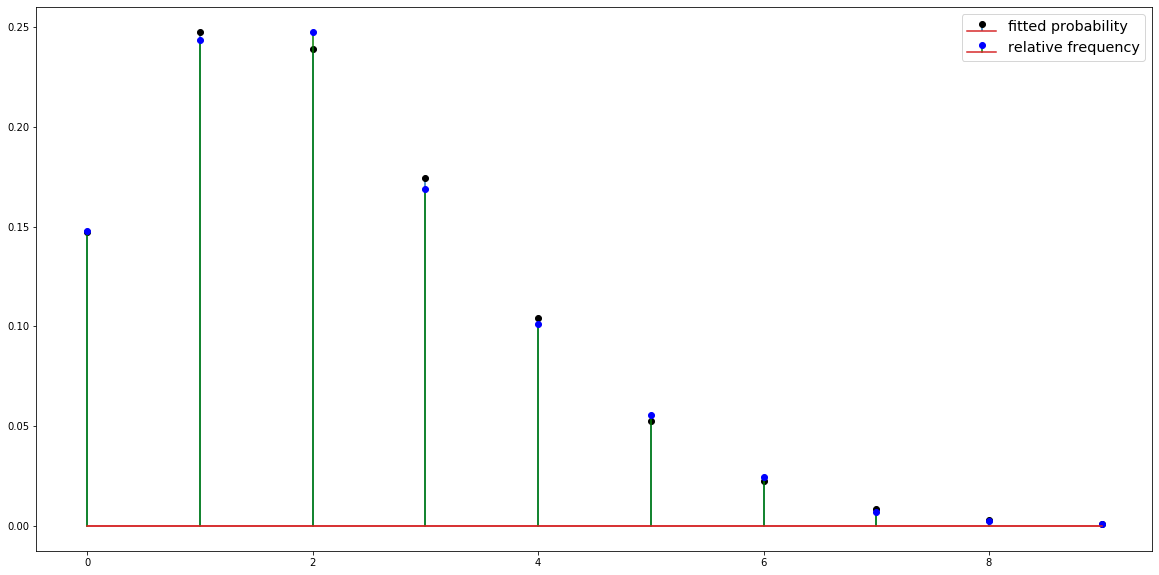

In [11]:
plt.figure(figsize=(20,10))
plt.stem(values, probability,use_line_collection=True,markerfmt='ko',label='ﬁtted probability')
plt.stem(values, N/sum(X),'g',markerfmt='bo',label='relative frequency')
plt.legend(fontsize ='x-large')
plt.show()

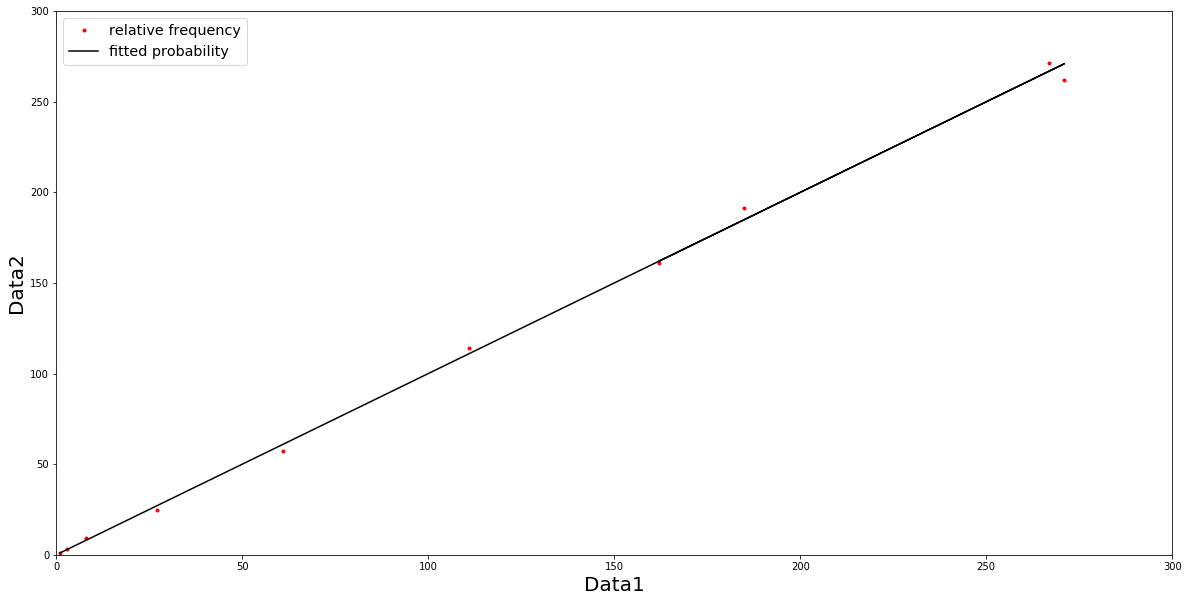

In [12]:
plt.figure(figsize=(20,10))
plt.plot(N,probability*1096,'r.',label='relative frequency')
plt.plot(N,N,'k-',label='ﬁtted probability')
plt.legend(loc="upper left", fontsize ='x-large')
plt.xlim(0,300)
plt.ylim(0,300)
plt.xlabel('Data1',fontsize=20)
plt.ylabel('Data2',fontsize=20)
plt.show()

(d) What is the probability that the vaue 10 will be observed ?

In [13]:
val = 10
probability_10 = probability[0] * poisson.pmf(val, probability[1]) + (1 - probability[0]) * poisson.pmf(val, probability[2])
print('The probability of obtaing 10 is: ' + str(probability_10) + ' which is expected to be colse to zero')

The probability of obtaing 10 is: 1.404045561116418e-13 which is expected to be colse to zero


. Suppose that the probability density function (PDF) of a bivariate random vector X =
(X1; X2)T is a mixture of bivariate normal:
f(x; θ) = (1 − π)φ(x; µ1; Σ1) + πφ(x; µ2; Σ2);
where φ(x; µ; Σ) is the bivariate normal PDF with mean µ and covariance matrix Σ, and
θ = [π; µ1; µ2; Σ1; Σ2].
The data set data mvnorm2mix.csv is a a random sample from this two normal mixtures, implement the EM algorithm to find the maximum likelihood extimate (MLE) of the parameter
θ. Present your result as following

(a) Print the MLE of the parameter θ

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


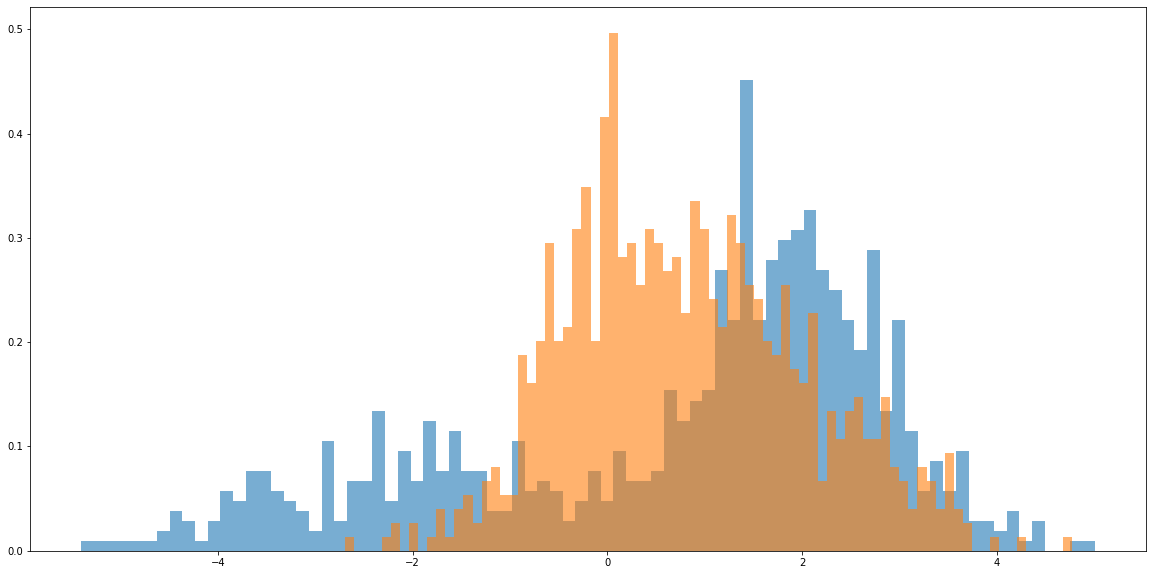

In [14]:
data = [np.array(pd.read_csv('data_mvnorm2mix.csv').iloc[:,0]), np.array(pd.read_csv('data_mvnorm2mix.csv').iloc[:,1])]
plt.figure(figsize=(20,10))
def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, normed = True, alpha = 0.6)

plot_hist(data)

In [15]:
data = np.array(pd.read_csv('data_mvnorm2mix.csv'))

In [16]:
def generate_data(n_data, means, covariances, weights):
    """creates a list of data points"""
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
   
    return data

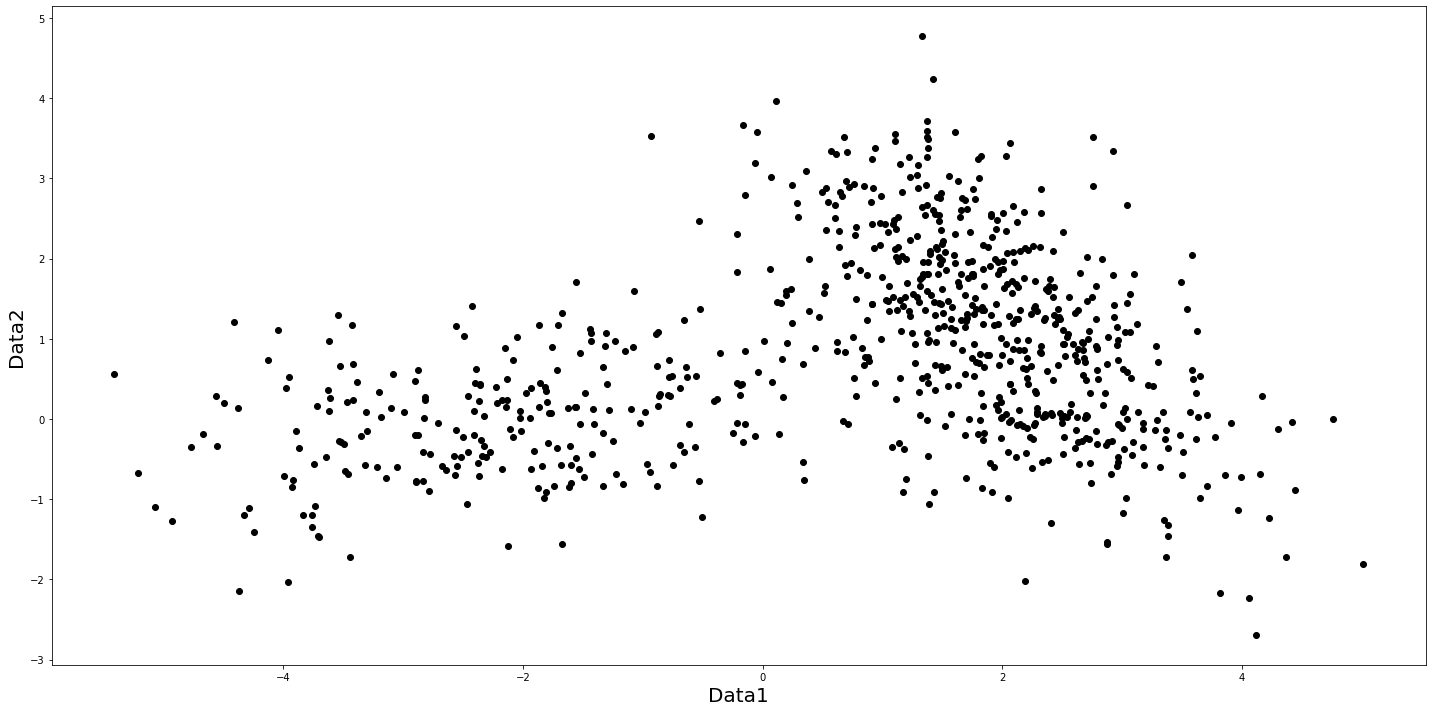

In [17]:
X = data
plt.figure(figsize=(20,10))
plt.plot(X[:, 0], X[:, 1], 'ko')
plt.xlabel('Data1',fontsize=20)
plt.ylabel('Data2',fontsize=20)
plt.tight_layout()

Setup initial model parameters, including mean, covariance matrix, and the weights for each cluster

In [18]:
init_means = np.array([
    [5, 0],
    [1, 1]
])

init_covariances = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .91]],
])

init_weights = [1 / 4, 1 / 2]


now lets compute EM

In [19]:
class GMM_Function:
    """
    Full covariance Gaussian Mixture Model,
    trained using Expectation Maximization.

    Parameters
    ----------
    n_components : int
        Number of clusters/mixture components in which the data will be
        partitioned into.

    n_iters : int
        Maximum number of iterations to run the algorithm.

    tol : float
        Tolerance. If the log-likelihood between two iterations is smaller than
        the specified tolerance level, the algorithm will stop performing the
        EM optimization.

    seed : int
        Seed / random state used to initialize the parameters.
    """

    def __init__(self, n_components: int, n_iters: int, tol: float, seed: int):
        self.n_components = n_components
        self.n_iters = n_iters
        self.tol = tol
        self.seed = seed
        self.log_likelihood = 0

    def fit(self, X):

        # data's dimensionality and responsibility vector
        n_row, n_col = X.shape     
        self.resp = np.zeros((n_row, self.n_components))

        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(n_row, self.n_components, replace = False)
        self.means = X[chosen]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.n_components, n_col, n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))

        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      

        for i in range(self.n_iters):
            log_likelihood_new = self._do_estep(X)
            self._do_mstep(X)

            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                self.converged = True
                break
  
            self.log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(self.log_likelihood)
            #print('likelihood is:',self.log_likelihood_trace)

        #print('likelihood is:',self.log_likelihood_trace)
        return self

    def _do_estep(self, X):
        """
        E-step: compute responsibilities,
        update resp matrix so that resp[j, k] is the responsibility of cluster k for data point j,
        to compute likelihood of seeing data point j given cluster k, use multivariate_normal.pdf
        """
        self._compute_log_likelihood(X)
        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def _compute_log_likelihood(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        return self

    def _do_mstep(self, X):
        """M-step, update parameters"""

        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        
        # weights
        self.weights = resp_weights / X.shape[0]

        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self

In [20]:
gmm = GMM_Function(n_components = 2, n_iters = 30, tol = 1e-4, seed = 4)
MLE_Means = gmm.fit(X).means
MLE_Covariances = gmm.covs
MLE_PI = gmm.weights
print('The MLE PI parameter for first and seccond distribution respectively is : \n' + str(MLE_PI) + '\n')
print('The MLE mean parameter for first and seccond distribution respectively is: \n' + str(MLE_Means)+ '\n')
print('The MLE covariance parameter for first and seccond distribution respectively is: \n' + str(MLE_Covariances)+ '\n')

The MLE PI parameter for first and seccond distribution respectively is : 
[0.30851578 0.69148422]

The MLE mean parameter for first and seccond distribution respectively is: 
[[-2.00074733  0.02320485]
 [ 1.97733866  1.15449289]]

The MLE covariance parameter for first and seccond distribution respectively is: 
[[[ 2.0191225   0.35611753]
  [ 0.35611753  0.5409009 ]]

 [[ 0.84294241 -0.66360033]
  [-0.66360033  1.5036826 ]]]



(b) Plot the value of the log-likelihood function vs iteration number. Comment on the
pattern of the plot.

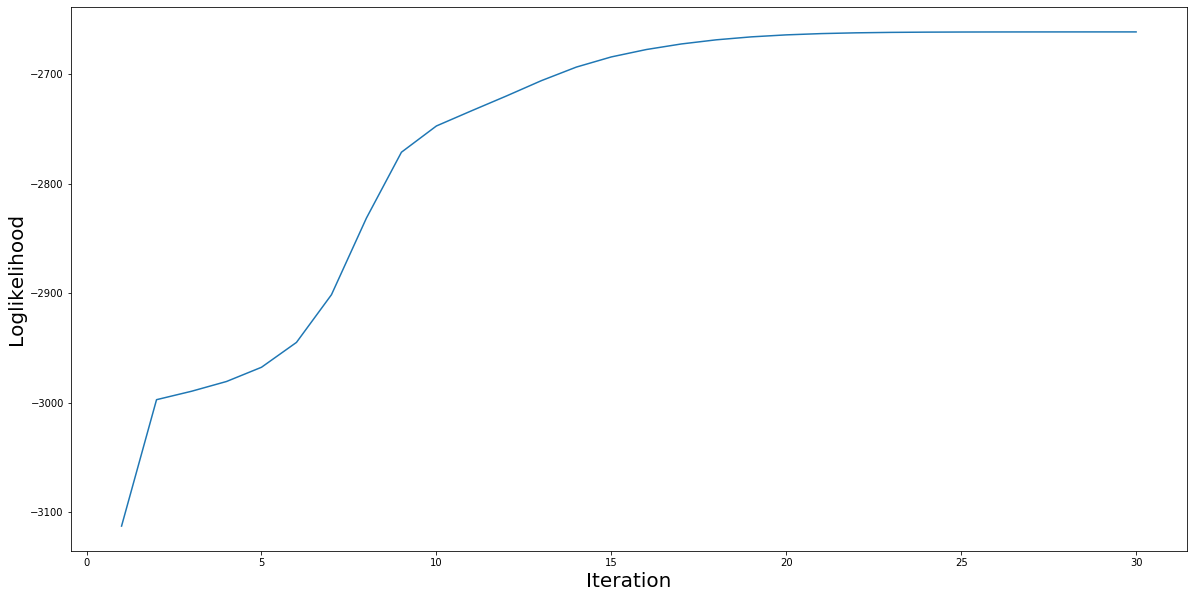

In [21]:
Liklihood = gmm.fit(X).log_likelihood_trace
X_val = np.arange(1,31,1)
plt.figure(figsize=(20,10))
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Loglikelihood',fontsize=20)
plt.plot(X_val,Liklihood)

(c) Classify each observation into one of the two classes. Display the classification results in
a scatter plot with two different colors.

In [22]:
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure(figsize=(20,10))
    #plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-6.0, 5.0, delta)
    y = np.arange(-4.0, 6.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    gmm = GaussianMixture(n_components=2).fit(data)
    labels = gmm.predict(X)
    

    col = ['green', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]        
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
        
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis')
    plt.xlabel('Data1',fontsize=20)
    plt.ylabel('Data2',fontsize=20)
    plt.title(title)
    plt.tight_layout()
    
    

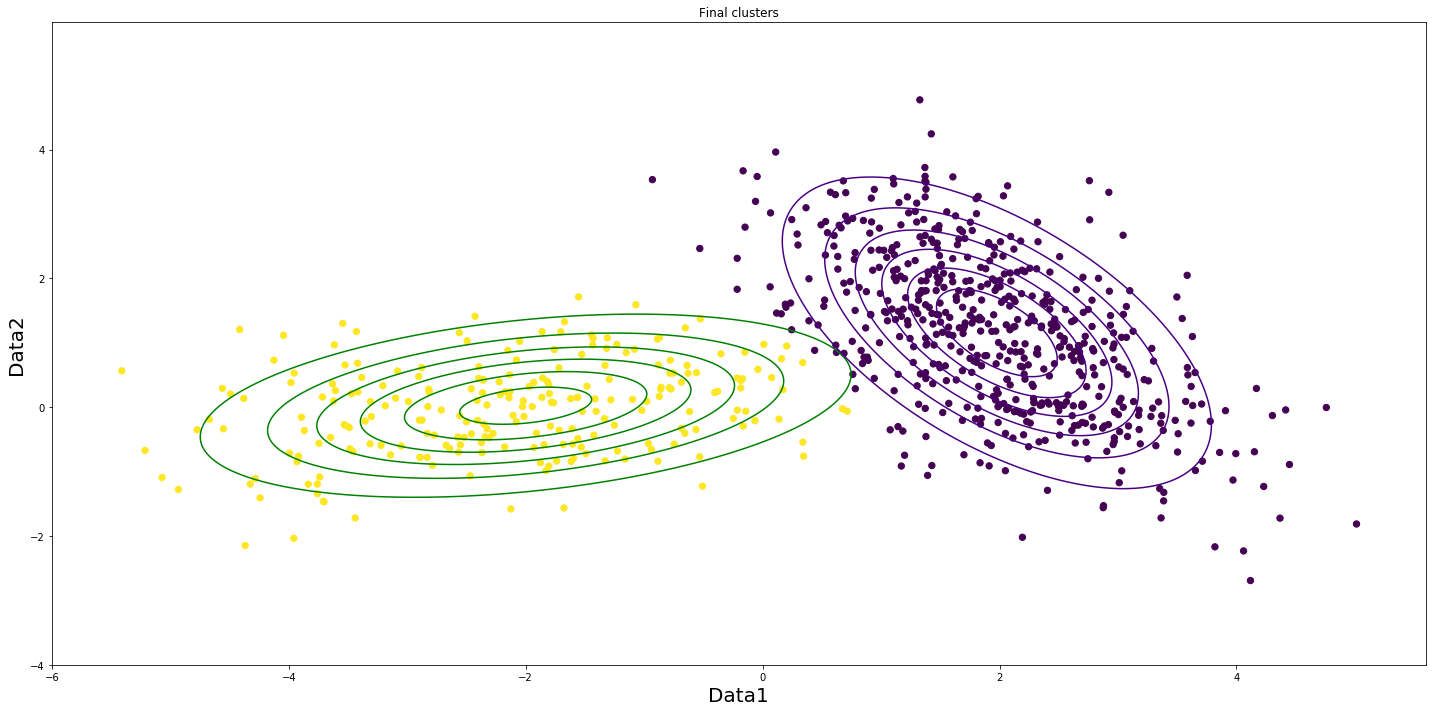

In [23]:
plot_contours(X, gmm.means, gmm.covs, 'Final clusters')

(d) Plot a surface plot of the fitted PDF f(x; θ^) .

In [24]:
def plot_surface(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure(figsize=(20,15))

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-10.0, 7.0, delta)
    y = np.arange(-10.0, 7.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    #fig = plt.figure()
    ax = plt.axes(projection='3d')
    mean1 = means[0]
    cov1 = covs[0]
    mean2 = means[1]
    cov2 = covs[1]

    z_grid = multivariate_normal(mean1, cov1).pdf(coordinates).reshape(x_grid.shape) + multivariate_normal(mean2, cov2).pdf(coordinates).reshape(x_grid.shape)
    ax.plot_surface(x_grid, y_grid, z_grid, rstride=20, cstride=20, cmap=cm.bone, edgecolors='r')
    plt.xlabel('Data1',fontsize=20)
    plt.ylabel('Data2',fontsize=20)
    ax.set_zlabel('PDF value',fontsize=20)
    plt.title(title)
    plt.tight_layout()

converged iteration: 50


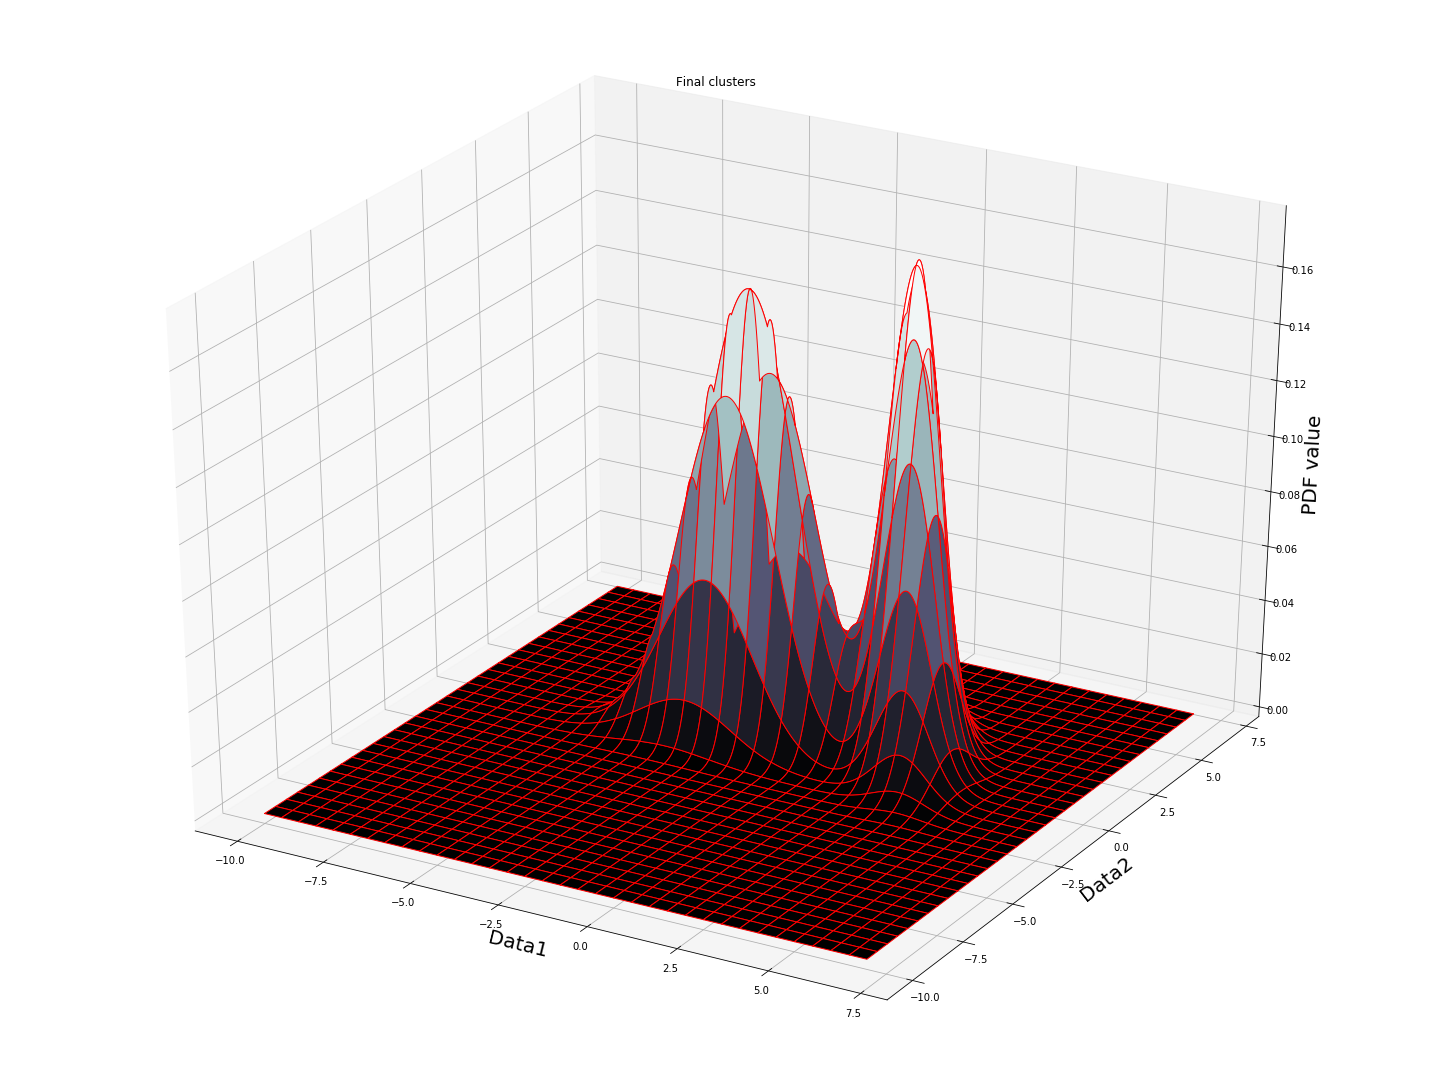

In [25]:
gmm = GMM_Function(n_components = 2, n_iters = 50, tol = 1e-4, seed = 4)
gmm.fit(X)

print('converged iteration:', len(gmm.log_likelihood_trace))
plot_surface(X, gmm.means, gmm.covs, 'Final clusters')

## Non-Coding Assignments:

3. Let fa1; : : : ; ang be a set of positive real numbers. Its arithmetic mean (AM), geometric mean
(GM), harmonic mean (HM) are defined as:
AM = 1
n
nX i
=1
ai;
GM =
nY i
=1
ai!1=n ;
HM = 1
1n
Pn i=1 a1i :
Prove:
HM ≤ GM ≤ AM:

First we start with the AM-GM inequality

\begin{equation*}
\frac{{a_1}+...+{a_n}}{n}  \geq \sqrt[n]{\frac{1}{a_1...a_n}}  
\end{equation*}

then we can write:

\begin{equation*}
\frac{{a_1}+...+{a_n}}{n} - {(a_1...a_n)}^{\frac{1}{n}}  \geq 0
\end{equation*}

now we consider Xn as our varaible and assume that Xn = Y, then

\begin{equation*}
f(y) = \frac{{a_1}+...+{y}}{n} - {(a_1...y)}^{\frac{1}{n}} 
\end{equation*}

with derivative being 

\begin{equation*}
f'(y) = \frac{1}{n} - \frac{1}{n}{(a_1...a_{n-1})}^{\frac{1}{n}} y^{-\frac{n-1}{n}}
\end{equation*}

we now can analyze the critical points of f or namly yc

\begin{equation*}
f'(y) = 0
\end{equation*}

\begin{equation*}
{(a_1...a_{n-1})}^{\frac{1}{n}} y_{c}^{-\frac{n-1}{n}} = 1
\end{equation*}

\begin{equation*}
 y_{c} = {(a_1...a_{n-1})}^{\frac{1}{n-1}}
\end{equation*}

that is simillar to he geometric mean of data. now we can compute the value of faunction f at point yc

\begin{equation*}
f(y_c) = \frac{a_1+...+a_{n-1}+{(a_1...a_{n-1})}^{\frac{1}{n-1}}}{n} - {(a_1...a_{n-1})}^{\frac{1}{n}}{(a_1...a_{n-1})}^{\frac{1}{(n-1)n}} = \frac{a_1+...+a_{n-1}}{n} + \frac{{(a_1...a_{n-1})}^{\frac{1}{n-1}}}{n} - {(a_1...a_{n-1})}^{\frac{1}{n-1}} = \frac{a_1+...+a_{n-1}}{n} - (n-1)\frac{{(a_1...a_{n-1})}^{\frac{1}{n-1}}}{n} = \frac{(n-1)}{n}\left(\frac{a_1+...+a_{n-1}}{n-1}- {(a_1...a_{n-1})}^{\frac{1}{n-1}}\right)
\end{equation*}

According ot the induction hypothesis that states that we can have equality only when a1, . . . , an are all equal then

\begin{equation*}
f(y_c) \geq 0
\end{equation*}

Therefor it proves that GM <= AM

and to prove that HM <= GM

\begin{equation*}
\frac{{a_1}+...+{a_n}}{n}  \geq \sqrt[n]{\frac{1}{a_1...a_n}}  
\end{equation*}

we can write

\begin{equation*}
\frac{\frac{1}{\sum_{}^{}a_i}}{n} \geq \frac{1}{\sqrt[n]{a_1...a_n}}
\end{equation*}

\begin{equation*}
\frac{\frac{\sqrt[n]{a_1...a_n}}{\sum_{}^{}a_i}}{n} \geq 1
\end{equation*}

\begin{equation*}
\sqrt[n]{a_1...a_n} \geq \frac{n}{\sum_{}^{}\frac{1}{a_i}} 
\end{equation*}

\begin{equation*}
\frac{n}{\frac{1}{a_1}+...+\frac{1}{a_n}} \leq \sqrt[n]{a_1...a_n}  
\end{equation*}

and proves that GM >= HM.

**then we can write AM >= GM >= HM**